In [1]:
import matplotlib.pyplot as plt

import sunpy.map
from sunpy.net import Fido
from sunpy.net import attrs as a

import astropy.units as u
from astropy.coordinates import SkyCoord

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

In [2]:
result = Fido.search(a.Time('2018/09/28 18:50:00', '2018/09/28 20:50:00'),
                     a.Instrument.hmi, a.Physobs.los_magnetic_field)

In [3]:
# we only want some of the files
ind=[2,6,22,26,131,134,151,154]
print(result[0][ind])

       Start Time               End Time        ...   Size          Info       
                                                ...  Mibyte                    
----------------------- ----------------------- ... -------- ------------------
2018-09-28 18:51:31.000 2018-09-28 18:51:32.000 ... -0.00098 45sec. Magnetogram
2018-09-28 18:54:31.000 2018-09-28 18:54:32.000 ... -0.00098 45sec. Magnetogram
2018-09-28 19:06:31.000 2018-09-28 19:06:32.000 ... -0.00098 45sec. Magnetogram
2018-09-28 19:09:31.000 2018-09-28 19:09:32.000 ... -0.00098 45sec. Magnetogram
2018-09-28 20:28:16.000 2018-09-28 20:28:17.000 ... -0.00098 45sec. Magnetogram
2018-09-28 20:30:31.000 2018-09-28 20:30:32.000 ... -0.00098 45sec. Magnetogram
2018-09-28 20:43:16.000 2018-09-28 20:43:17.000 ... -0.00098 45sec. Magnetogram
2018-09-28 20:45:31.000 2018-09-28 20:45:32.000 ... -0.00098 45sec. Magnetogram


In [4]:
downloaded_file = Fido.fetch(result[0][2],overwrite=False)
# downloaded_file = Fido.fetch(result[0][ind])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

hmi_m_45s_2018_09_28_18_52_30_tai_magnetogram.fits:   0%|          | 0.00/16.1M [00:00<?, ?B/s]

In [5]:
# loads in file but also rotates to have N at top as HMI upside down
hmr = sunpy.map.Map(downloaded_file).rotate(order=3)

In [10]:
bl = SkyCoord(-400*u.arcsec, -350*u.arcsec, frame=hmr.coordinate_frame)
tr = SkyCoord(-200*u.arcsec, -150*u.arcsec, frame=hmr.coordinate_frame)
hmrs = hmr.submap(bottom_left=bl,top_right=tr)

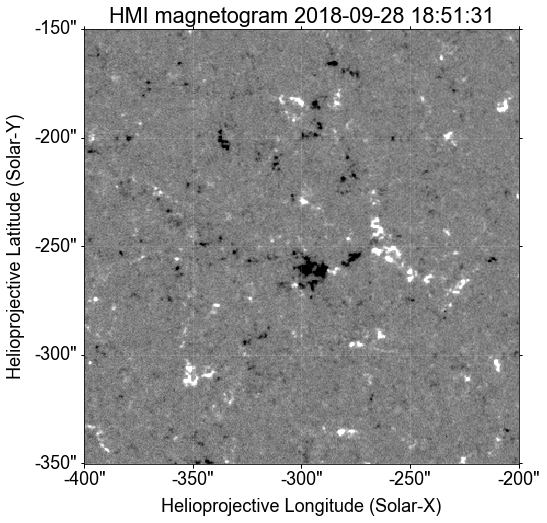

In [11]:
import matplotlib.colors as colors
fig = plt.figure(figsize=(8, 8))
hmrs.plot(norm=colors.Normalize(vmin=-100,vmax=100))
plt.show()